# Project Business Statistics: E-News Express



### Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective

Statistical analysis of business data. Explore the dataset and extract insights from the data.

We are performing the statistical analysis to answer the following questions:

>1. Exploring the dataset and extract insights using Exploratory Data Analysis.
>2. Do the users spend more time on the new landing page than the old landing page?
>3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
>4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
>5. Is the mean time spent on the new page same for the different language users?
*Considering significance level of 0.05 for all tests.


### Data Dictionary

>1. user_id - This represents the user ID of the person visiting the website.
>2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
>3. landing_page - This represents whether the landing page is new or old.
>4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
>5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
>6. language_preferred - This represents the language chosen by the user to view the landing page.

### Let us start by importing the required libraries

In [1]:
#importing the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats# this library contains a large number of probability distributions as well as a growing library of statistical functions.
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [2]:
import warnings # code to remove any warning on the execution
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


###### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row gives information about users, their activities, time spent and preferences

In [4]:
# code to find the data records of the dataset.
df.shape

(100, 6)

#### Observations:
The dataset consists of 100 records and 6 fields.

### observations based on the below output from the info() method.

In [5]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
The dataset does not have any null records. There are 4 columns of datatype object, 1 column of integer and 1 column of float. 

In [6]:
# converting "objects" to "category" reduces the data space required to store the dataframe
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted']= df['converted'].astype('category')
df['language_preferred']= df['language_preferred'].astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
We changed datatype of the fields to category from object. This led to our memory usage reduction.

### code to find the summary statistics and write your observations based on that.

In [7]:
# summary statistics
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.000,52.296,546443.00,546467.75,546492.500,546567.250,546592.00
time_spent_on_the_page,100.0,5.378,2.378,0.19,3.88,5.415,7.022,10.71


#### Observations:
We observe that average time spent on the page is 5.37 minutes. Most of the data of time spent lie between 5.4 minutes and 7 minutes as shown by $25^{th}$ and $75^{th}$ percentile.
Average time spent in landing page is 5.3 minutes ranging from as high as 10.71 minutes to as low as 0.19 minute.

In [8]:
mean_convert=df[df['converted']== 'yes'].time_spent_on_the_page.mean()
mean_not_convert=df[df['converted']== 'no'].time_spent_on_the_page.mean()#code to find average time spent in landing page by responders
print('Observation:', '\n'' Average time spent by the people who converted-', round(mean_convert, 2), 'minutes','\n',
      'Average time spent by people who did not convert-',round(mean_not_convert, 2), 'minutes') 


Observation: 
 Average time spent by the people who converted- 6.62 minutes 
 Average time spent by people who did not convert- 3.92 minutes


In [30]:
mean_control=df[df['group']== 'control'].time_spent_on_the_page.mean()
mean_treatment=df[df['group']== 'treatment'].time_spent_on_the_page.mean()#code to find average time spent by each group cohort
print('Observation:', '\n'' Average time spent by the control group-', round(mean_control, 2), 'minutes','\n',
      'Average time spent by the treatment group-',round(mean_treatment, 2), 'minutes') 


Observation: 
 Average time spent by the control group- 4.53 minutes 
 Average time spent by the treatment group- 6.22 minutes


In [9]:
df_lang= pd.DataFrame(pd.crosstab(df['converted'],df['language_preferred'])) #to find the conversion among different language cohorts
df_lang

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Observation
We see the group is equally distributed amongst language preference

In [10]:
pd.crosstab(df['converted'],df['group']) # code to see how many converted within the control and treatment groups

group,control,treatment
converted,,
no,29,17
yes,21,33


### Observation
We can see 21 people among control group while 33 among treatment group got converted.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

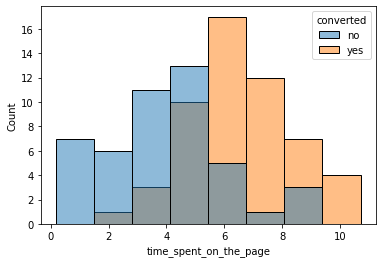

In [11]:
sns.histplot(x='time_spent_on_the_page', data= df, hue='converted'); #Histogram plot

### Observation
Here we can see the the average time spent on the landing page is around 5 minutes.

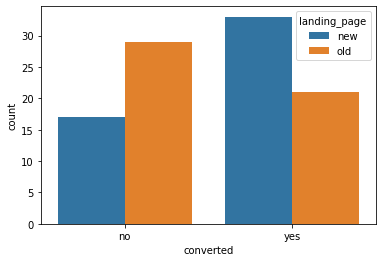

In [12]:
sns.countplot(x= 'converted', hue='landing_page', data= df); #countplot as observed

### Observation
Conversion rate is higher than non-conversion. Conversion via the newer landing page is seemingly higher.

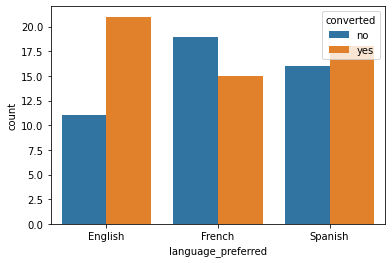

In [13]:
sns.countplot(data= df, x='language_preferred', hue='converted'); #countplot to find conversion number among various lanugage cohorts

### Observation:
Conversion among English speaking population is higher proportionally than among French and Spanish speaking population.

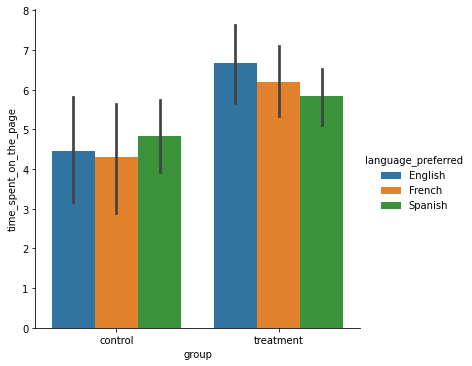

In [14]:
sns.catplot(x='group', y= 'time_spent_on_the_page',kind='bar',hue= 'language_preferred', data= df); #catplot to observe the behavior of control and treatment group

### Observation:
Interestingly, we see people are spending more time in new landing page as denoted by treatment group while control group using old landing page are spending less time to decide. Also, observable is that Spanish speaking group is spending more time in old website while English speaking group is spending more time in new landing page.

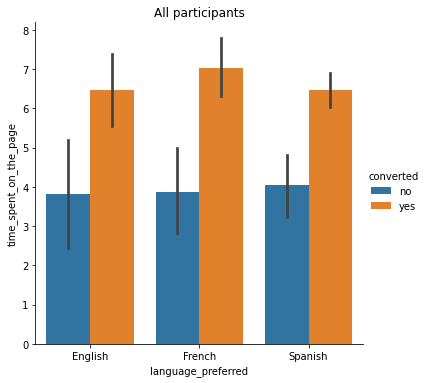

In [15]:
sns.catplot(x='language_preferred', y= 'time_spent_on_the_page', kind= 'bar', hue='converted', data= df).set(title = 'All participants');
#catplot to see the behavior of different language group

### Observation:
Conversion among all language groups is high regardless of control and treatment group, French having the highest conversion rate.

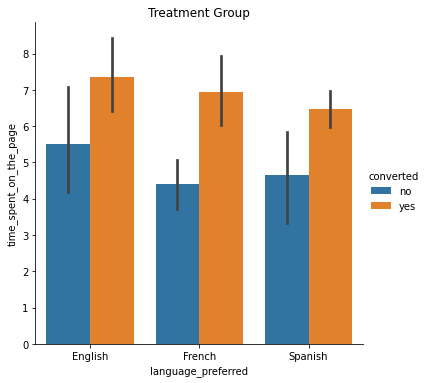

In [28]:
a= sns.catplot(x='language_preferred', y= 'time_spent_on_the_page', kind= 'bar', hue='converted', data= treatment_grp).set(title = 'Treatment Group');
#catplot to see the behavior of different language group under treatment group

### Observation:
Under the treatment group where all participants were landed on the new page, we find English speaking group conversion rate is highest among all, albeit, that group also has a higher non-conversion behavior.

### Defining null and alternative hypotheses and deciding on test to be performed.
'Group' and 'converted' are two categorical variables.
We want to see if the proportion of conversion of treatment group is significantly different from the proportion of conversion of control group.

> $H_0:$ Proportion of conversion of treatment group <= Proportion of conversion of control group.


> $H_a:$ Proportion of conversion of treatment group > Proportion of conversion of control group.


The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.
Here, we select α = 0.05

In [17]:
control_conv = df[df['group']=='control'].converted.value_counts()['yes']
treatment_conv =  df[df['group']=='treatment'].converted.value_counts()['yes']
print('Converted from control group and treatment group are {0} and {1} respectively'.format(control_conv, treatment_conv))
control= df.group.value_counts()['control']
treatment= df.group.value_counts()['treatment']
print('Total number of participants in control and treatment group are {0} and {1} respectively'. format(control, treatment))
prop_control= control_conv/control
prop_treatment= treatment_conv/treatment
print('Proportion of converted within control and treatment group are {0} and {1} respectively'.format(prop_control, prop_treatment))

#code to figure out the proportion of converted in each Group.

Converted from control group and treatment group are 21 and 33 respectively
Total number of participants in control and treatment group are 50 and 50 respectively
Proportion of converted within control and treatment group are 0.42 and 0.66 respectively


In [18]:
stat, pval= proportions_ztest([control_conv, treatment_conv], [control, treatment], alternative= 'two-sided')
print('The P-value of the test is', str(pval))
# Z-Proportions test

The P-value of the test is 0.016052616408112556


In [19]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


'Language' and 'converted' are two categorical variables. We want to see if the conversion of people depends upon their language.

𝐻0:  Conversion behavior does not depend upon language spoken.

𝐻𝑎:  Conversion behavior depends upon language spoken.

The formulated hypotheses are concerned with dependency of conversion on different languages spoken. A test of independence can be used to analyse the hypotheses and draw a conclusion. We shall use a chi-squared test for this problem. Here, we select α = 0.05


In [20]:
English_conv = df[df['language_preferred']=='English'].converted.value_counts()['yes']
Spanish_conv = df[df['language_preferred']=='Spanish'].converted.value_counts()['yes']
French_conv = df[df['language_preferred']=='French'].converted.value_counts()['yes']
print('Converted from English speaking group, Spanish speaking group and French speaking group are {0}, {1} and {2} respectively'.format(English_conv, Spanish_conv, French_conv))

English= df.language_preferred.value_counts()['English']
Spanish= df.language_preferred.value_counts()['Spanish']
French= df.language_preferred.value_counts()['French']
print('Total participants from English speaking group, Spanish speaking group and French speaking group are {0}, {1} and {2} respectively'.format(English, Spanish, French))

prop_English= round(English_conv/English,2)
prop_Spanish= round(Spanish_conv/Spanish,2)
prop_French= round(French_conv/French,2)
print('Proportion of conversion from English speaking group, Spanish speaking group and French speaking group are {0}, {1} and {2} respectively'.format(prop_English, prop_Spanish, prop_French))

#code to figure out the proportion of converted in each language cohort.

Converted from English speaking group, Spanish speaking group and French speaking group are 21, 18 and 15 respectively
Total participants from English speaking group, Spanish speaking group and French speaking group are 32, 34 and 34 respectively
Proportion of conversion from English speaking group, Spanish speaking group and French speaking group are 0.66, 0.53 and 0.44 respectively


In [21]:
chi, p_value, dof, expected = chi2_contingency(df_lang)
print('The p-value is ', str(p_value))
#Chi-Squared test of independence.

The p-value is  0.21298887487543447


In [22]:
# to find conclusion based on p-value
if p_value < 0.05:
    print(f'As the P-value {p_value} is less than the level of significance of 0.05, we reject the null hypothesis.')
else:
    print(f'As the P-value {p_value} is greater than the level of significance of 0.05, we fail to reject the null hypothesis.')

As the P-value 0.21298887487543447 is greater than the level of significance of 0.05, we fail to reject the null hypothesis.


In [31]:
treatment_grp =  df[df['group']=='treatment']
Mean_time_by_english= treatment_grp[treatment_grp['language_preferred']=='English'].mean()
Mean_time_by_spanish= treatment_grp[treatment_grp['language_preferred']=='Spanish'].mean()
Mean_time_by_french= treatment_grp[treatment_grp['language_preferred']=='French'].mean()

#code to calculate the mean time spent by each language cohort in the treatment group

### Defining and stating the hypothesis
Let's write the null and alternative hypothesis
Let  𝜇1, 𝜇2, 𝜇3  be the means time spend on the new page by English, Spanish and French language speaking groups respectively.

We will test the null hypothesis

>𝐻0:𝜇1=𝜇2=𝜇3

>against the alternative hypothesis

>𝐻𝑎:  At least one group of language is different from the rest.

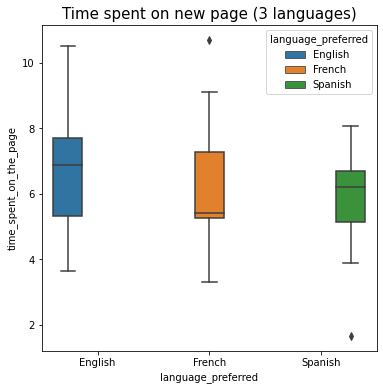

In [24]:
treatment_grp.groupby('language_preferred')['time_spent_on_the_page'].mean()

fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = treatment_grp, hue = 'language_preferred')
a.set_title("Time spent on new page (3 languages)", fontsize=15)
plt.show()
#code to draw boxplot of average time spent by each language group

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Languages spoken follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Languages spoken does not follow a normal distribution

In [25]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(treatment_grp['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [26]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( treatment_grp['time_spent_on_the_page'][treatment_grp['language_preferred']=="English"], 
                                   treatment_grp['time_spent_on_the_page'][treatment_grp['language_preferred']=="Spanish"], 
                                   treatment_grp['time_spent_on_the_page'][treatment_grp['language_preferred']=="French"])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since p-value is significantly larger than 0.05, we fail to reject the null hypothesis.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### One way ANOVA test

In [27]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(treatment_grp.loc[treatment_grp['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              treatment_grp.loc[treatment_grp['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              treatment_grp.loc[treatment_grp['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


Since P-value is significantly greater than 0.05, we fail to reject the null hypothesis.

### Conclusion and Recommendations

#### Key Insights:
 - Based on the different hypothesis testing performed above, we can tell the new landing page is fairly successful in converting the visitors.
 - On testing whether time spent on the new landing page by different language speaking groups is different, we found that there is not significant difference on that front. This hypothesis testing was performed using one way ANOVA test to understand if there was any difference between average time spent by different categorical groups.
 - The p-value 0.016 for test of proportions of conversion is less than 0.05 significance level on both sides and also less than 0.025 on both sides indicating that people have converted more through new landing page than through old landing page.
 - We see that people who have converted spent more time on the page than who did not regardless of new or old page.